In [67]:
import geopandas as gpd
import networkx as nx
import pandas as pd
import tempun
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from celluloid import Camera
import random
import geopandas as gpd
from shapely.geometry import LineString, Point, MultiPoint

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from IPython.display import HTML
#result = pyreadr.read_r('/path/to/file.Rds')


In [2]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_42616/1576836852.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [3]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions_merged = pleiades_regions.unary_union

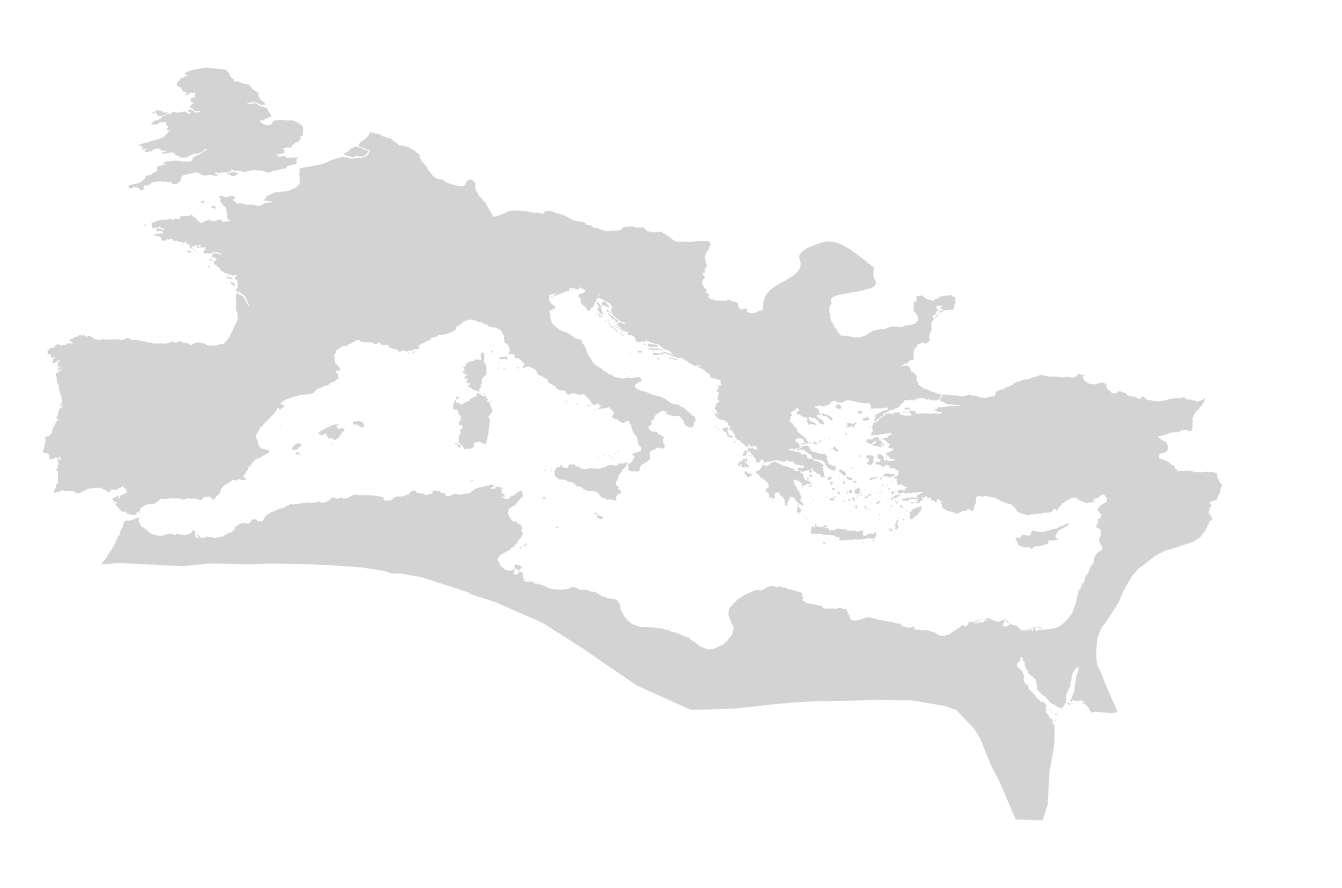

In [4]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
#GIST.plot()
ax.set_xlim(-10, 45)
ax.set_axis_off()

In [5]:
origo_df = pd.read_json("../data/origo_df.json")

In [6]:
origo_geo = origo_df[origo_df["pleiades_Latitude"].notnull() & origo_df["pleiades_Longitude"].notnull()]
len(origo_geo)

682

In [7]:
origo_df

,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title
18,HD000011/1,HD000011,Batavus+,Batavus,NaN,None,NaN,NaN,None
50,HD000030/1,HD000030,Italicensis*,Italicensis,NaN,None,NaN,NaN,None
53,HD000033/1,HD000033,Laudicenus (= Laodicenus) ex Asia,Laodicenus Asia,NaN,None,NaN,NaN,None
60,HD000035/1,HD000035,Iponobensis,Iponobensis,NaN,None,NaN,NaN,None
66,HD000040/2,HD000040,Pannonius*,Pannonius,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...
93499,HD082681/1,HD082681,Antiochensis*,Antiochensis*,NaN,None,NaN,NaN,None
93512,HD082689/1,HD082689,Agrippinensi*,Agrippinensi,NaN,None,NaN,NaN,None
93540,HD082721/1,HD082721,domo Volsiniis*,domo Volsiniis*,NaN,None,NaN,NaN,None
93555,HD082732/3,HD082732,Pautalia,Pautalia,481949.0,[Pautalia],42.281134,22.688244,Pautalia


In [8]:
# use your own dataset
LIST = gpd.read_parquet("../../LIRE_ETL/data/large_data/LIST_v0-3.parquet")

In [266]:
len(LIST[LIST["EDH-ID"].isin(origo_geo["hd_nr"])])

524

# Flying dots

In [267]:
LIST_edh= LIST[LIST["EDH-ID"].notnull()]
LIST_edh = LIST_edh[(LIST_edh["not_before"].notnull() | LIST_edh["not_after"].notnull())]
LIST_edh["random_dates"] = LIST_edh.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, antepost=True),axis=1)
LIST_edh["random_date"] = LIST_edh["random_dates"].apply(lambda x: x[0])

In [268]:
origo_geo["origo_point"] = origo_geo.apply(lambda row: Point([row["pleiades_Longitude"], row["pleiades_Latitude"]]), axis=1)
origo_geo = gpd.GeoDataFrame(origo_geo, geometry=origo_geo["origo_point"])


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot: >

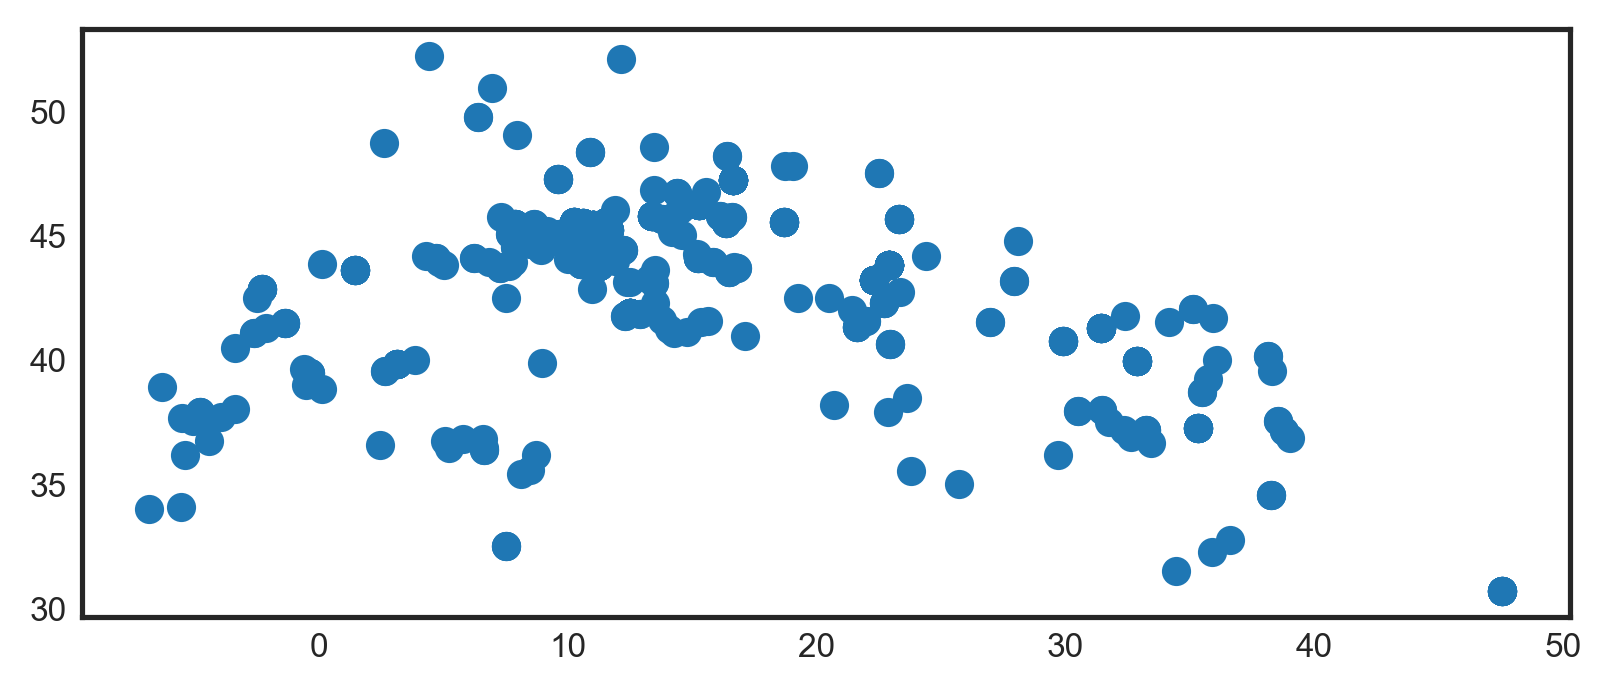

In [269]:
origo_geo.plot()

In [270]:
edh_geo_dict = dict(zip(LIST_edh["EDH-ID"], LIST_edh["geometry"]))
edh_date_dict = dict(zip(LIST_edh["EDH-ID"], LIST_edh["random_date"]))
def get_val_from_dict(x, data_dict):
    try:
        return data_dict[x]
    except:
        return None
origo_geo["edh_point"] = origo_geo["hd_nr"].apply(lambda x: get_val_from_dict(x, edh_geo_dict))
origo_geo["random_date"] = origo_geo["hd_nr"].apply(lambda x: get_val_from_dict(x, edh_date_dict))

In [271]:
origo_geo = origo_geo[(origo_geo["random_date"].notnull()) & (origo_geo["origo_point"].notnull()) & (origo_geo["edh_point"].notnull())]
len(origo_geo)

642

In [272]:
origo_geo["origo_line"] = origo_geo.apply(lambda row: LineString([row["origo_point"], row["edh_point"]]), axis=1)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [273]:
origo_geo

,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,origo_point,geometry,edh_point,random_date,origo_line
71,HD000043/1,HD000043,Sendica (= Serdica),Serdica,207439.0,[Serdica],42.722826,23.342891,Serdica,POINT (23.34289 42.72283),POINT (23.34289 42.72283),POINT (12.4862 41.8917),226,"LINESTRING (23.34289 42.72283, 12.48620 41.89170)"
219,HD000129/1,HD000129,Dertona,Dertona,383633.0,[Dertona],44.897171,8.865452,Dertona,POINT (8.86545 44.89717),POINT (8.86545 44.89717),POINT (12.4862 41.8917),68,"LINESTRING (8.86545 44.89717, 12.48620 41.89170)"
220,HD000129/2,HD000129,Dertona*,Dertona,383633.0,[Dertona],44.897171,8.865452,Dertona,POINT (8.86545 44.89717),POINT (8.86545 44.89717),POINT (12.4862 41.8917),68,"LINESTRING (8.86545 44.89717, 12.48620 41.89170)"
683,HD000358/1,HD000358,Varvaria+*,Varvaria,197574.0,[Varvaria],43.925326,15.842858,Varvaria,POINT (15.84286 43.92533),POINT (15.84286 43.92533),POINT (8.2674 49.9951),123,"LINESTRING (15.84286 43.92533, 8.26740 49.99510)"
830,HD000423/1,HD000423,Igilgili*,Igilgili,305095.0,[Igilgili],36.820982,5.765676,Igilgili,POINT (5.76568 36.82098),POINT (5.76568 36.82098),POINT (8.7101 36.1789),102,"LINESTRING (5.76568 36.82098, 8.71010 36.17890)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93104,HD082148/1,HD082148,Augusta*,Augusta,648577.0,"[Augusta, Augustopolis, [Thebae]]",37.245212,35.344087,Augusta/Augustopolis/[Thebae]?,POINT (35.34409 37.24521),POINT (35.34409 37.24521),POINT (7.0887 50.7568),97,"LINESTRING (35.34409 37.24521, 7.08870 50.75680)"
93399,HD082559/1,HD082559,Heraclea*,Heraclea,844944.0,[Heraclea],41.283255,31.417414,Heraclea,POINT (31.41741 41.28326),POINT (31.41741 41.28326),POINT (6.6916 51.1982),135,"LINESTRING (31.41741 41.28326, 6.69160 51.19820)"
93416,HD082572/1,HD082572,Verona,Verona,383816.0,[Verona],45.442130,10.995736,Verona,POINT (10.99574 45.44213),POINT (10.99574 45.44213),POINT (6.6578 51.4406),105,"LINESTRING (10.99574 45.44213, 6.65780 51.44060)"
93461,HD082633/1,HD082633,Tolosa*,Tolosa,246694.0,[Tolosa],43.604175,1.443246,Tolosa,POINT (1.44325 43.60417),POINT (1.44325 43.60417),POINT (5.9042 51.835),133,"LINESTRING (1.44325 43.60417, 5.90420 51.83500)"


<AxesSubplot: >

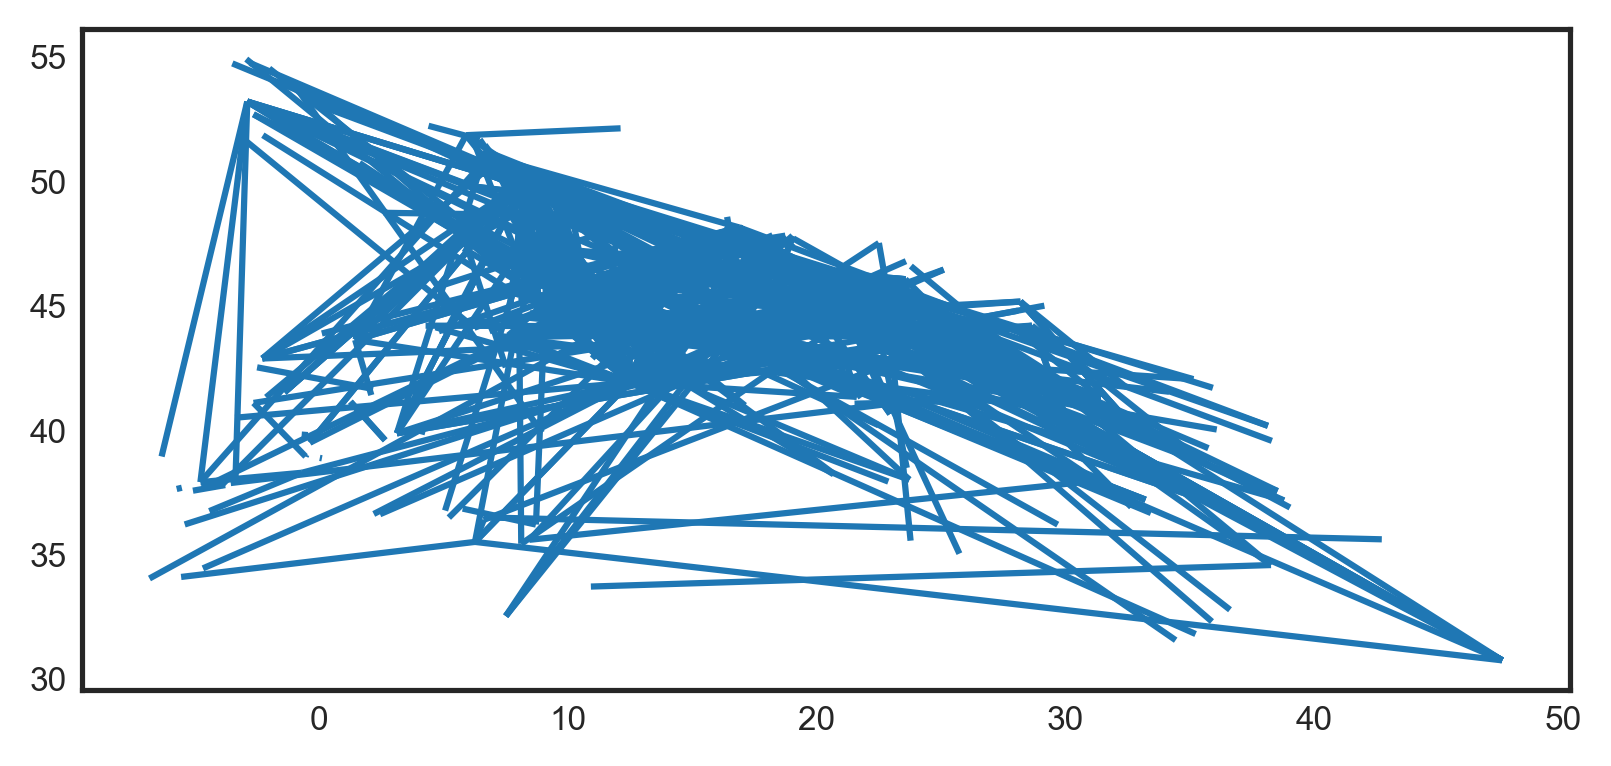

In [274]:
origo_geo.set_geometry('origo_line').plot()

In [275]:
origo_geo.set_geometry('origo_line', inplace=True)

# Minimal animation with lines

In [276]:
year = 100
keep = 50
list_subset = origo_geo[(origo_geo["random_date"]<=year) & (origo_geo["random_date"]>year-keep)]
list_subset

,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,origo_point,geometry,edh_point,random_date,origo_line
219,HD000129/1,HD000129,Dertona,Dertona,383633.0,[Dertona],44.897171,8.865452,Dertona,POINT (8.86545 44.89717),POINT (8.86545 44.89717),POINT (12.4862 41.8917),68,"LINESTRING (8.86545 44.89717, 12.48620 41.89170)"
220,HD000129/2,HD000129,Dertona*,Dertona,383633.0,[Dertona],44.897171,8.865452,Dertona,POINT (8.86545 44.89717),POINT (8.86545 44.89717),POINT (12.4862 41.8917),68,"LINESTRING (8.86545 44.89717, 12.48620 41.89170)"
3322,HD001465/1,HD001465,Parma+,Parma,383737.0,[Parma],44.801507,10.327967,Parma,POINT (10.32797 44.80151),POINT (10.32797 44.80151),POINT (12.4862 41.8917),63,"LINESTRING (10.32797 44.80151, 12.48620 41.89170)"
8980,HD004229/1,HD004229,Neapolis*,Neapolis,639008.0,[Neapolis],37.965759,31.481278,Neapolis,POINT (31.48128 37.96576),POINT (31.48128 37.96576),POINT (8.4441 35.5663),92,"LINESTRING (31.48128 37.96576, 8.44410 35.56630)"
9289,HD004410/1,HD004410,Parma*,Parma,383737.0,[Parma],44.801507,10.327967,Parma,POINT (10.32797 44.80151),POINT (10.32797 44.80151),POINT (15.9936 44.0317),74,"LINESTRING (10.32797 44.80151, 15.99360 44.03170)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89482,HD078058/1,HD078058,Ateste,Ateste,393382.0,[Ateste],45.227738,11.656616,Ateste,POINT (11.65662 45.22774),POINT (11.65662 45.22774),POINT (8.2674 49.9951),70,"LINESTRING (11.65662 45.22774, 8.26740 49.99510)"
89617,HD078211/1,HD078211,Alba*,Alba,246153.0,[Alba],42.856039,-2.290949,Alba,POINT (-2.29095 42.85604),POINT (-2.29095 42.85604),POINT (7.0887 50.7568),62,"LINESTRING (-2.29095 42.85604, 7.08870 50.75680)"
89618,HD078214/1,HD078214,Pollentia*,Pollentia,266004.0,[Pollentia],39.848593,3.123059,Pollentia,POINT (3.12306 39.84859),POINT (3.12306 39.84859),POINT (6.6916 51.1982),67,"LINESTRING (3.12306 39.84859, 6.69160 51.19820)"
89680,HD078279/1,HD078279,Bononia*,Bononia,393421.0,"[Felsina, Bononia]",44.494574,11.345547,Felsina/Bononia,POINT (11.34555 44.49457),POINT (11.34555 44.49457),POINT (8.2674 49.9951),71,"LINESTRING (11.34555 44.49457, 8.26740 49.99510)"


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been dis

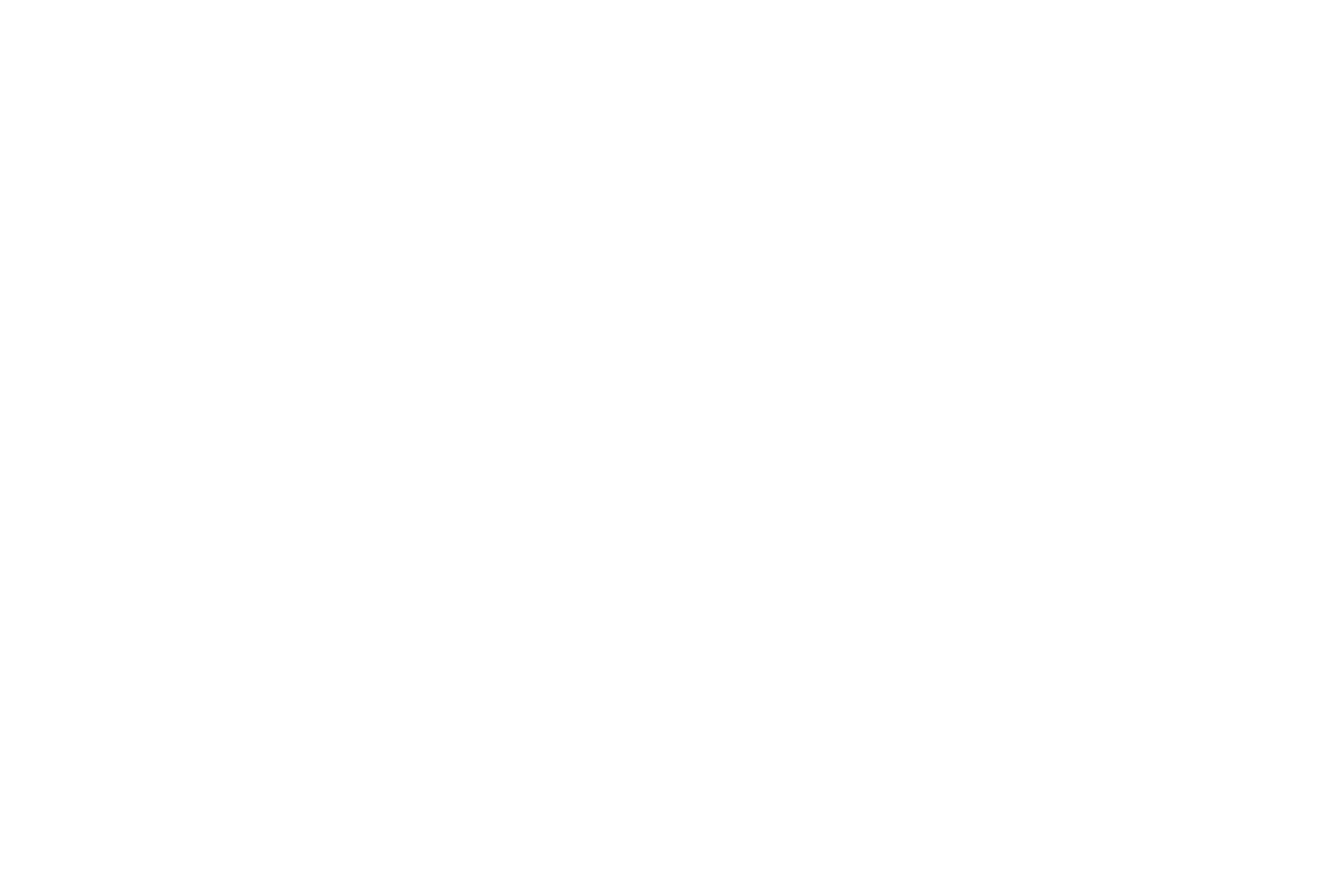

In [277]:
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)


camera = Camera(fig)
for year in range(-100, 400, 5):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = origo_geo[(origo_geo["random_date"]<=year) & (origo_geo["random_date"]>year-keep)]
    list_subset.plot(ax=ax)
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_lines.gif')

# Lines into points

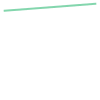

In [278]:
line = origo_geo["origo_line"].values[0] #should work also with paths, not only direct lines
line

In [279]:
type(line)

shapely.geometry.linestring.LineString

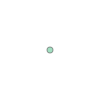

In [280]:
line.interpolate(0.9)

In [281]:
interpolated = MultiPoint([line.interpolate((i/10), normalized=True) for i in range(1, 10)])

In [285]:
n_segments = 100
segments = [LineString([line.interpolate((i/n_segments), normalized=True), line.interpolate((i+1/n_segments), normalized=True)]) for i in range(0, n_segments)]
cm = plt.get_cmap('RdBu')
color_vals = list(cm([val/n_segments for val in range(n_segments)]))

In [286]:
segments_df = gpd.GeoDataFrame({"geometry": segments, "color" : color_vals})

<AxesSubplot: >

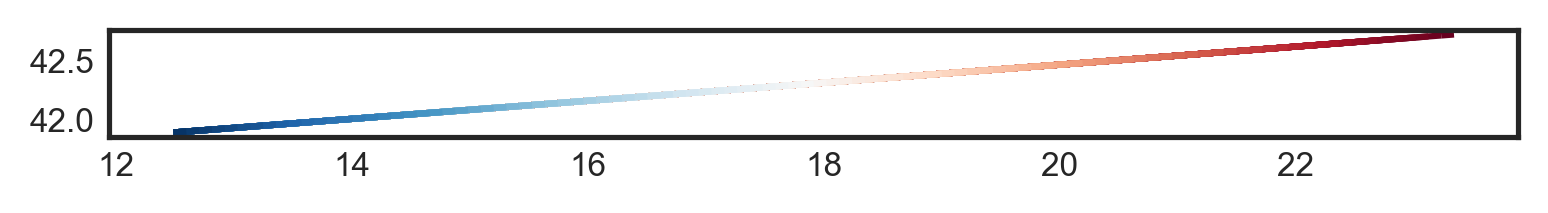

In [287]:
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()

segments_df.plot(color=segments_df["color"], ax=ax)

# point data with random color and fast beginning and end

In [288]:
origo_points_list = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
    dates = range(year-age+step_len,year+step_len, step_len)
    for i,y in enumerate(dates):
        data = {
            "date": y,
            "geometry" : Point(line.interpolate((i/len(dates)), normalized=True)),
            "color" : color
        }
        origo_points_list.append(data)

# point data with random color with waiting at the beginning and end


In [289]:
n = 0
line = origo_geo.iloc[n]["origo_line"]
line = origo_geo.iloc[n]["origo_line"]
year = origo_geo.iloc[n]["random_date"]
color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
dates = range(year-age+step_len,year+step_len, step_len)
print(Point(line.interpolate(0.12, normalized=True)))

POINT (22.04008808 42.62309088)


In [290]:
[Point(line.interpolate((i/(len(dates)-2)), normalized=True)) for i in range(len(dates) - 2)]

In [291]:
colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
colors

['tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green',
 'tab:green']

In [292]:
all_dates = []
all_points = []
all_colors = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
    dates = range(year-age+step_len,year+step_len, step_len)
    points = [Point(line.interpolate((i/(len(dates)-3)), normalized=True)) for i in range(len(dates) - 2)]
    points = [origo_geo.iloc[n]["origo_point"]] + points +  [origo_geo.iloc[n]["edh_point"]]
    all_dates.extend(dates)
    all_points.extend(points)
    all_colors.extend(colors)

In [293]:
origo_linepoints_gdf = gpd.GeoDataFrame({"date" : all_dates, "geometry" : all_points, "color" : all_colors})
origo_linepoints_gdf

,date,geometry,color
0,181,POINT (23.34289 42.72283),tab:purple
1,186,POINT (23.34289 42.72283),tab:purple
2,191,POINT (21.79194 42.60409),tab:purple
3,196,POINT (20.24098 42.48536),tab:purple
4,201,POINT (18.69002 42.36663),tab:purple
...,...,...,...
6415,192,POINT (24.23462 43.04191),tab:orange
6416,197,POINT (24.62121 43.23211),tab:orange
6417,202,POINT (25.00781 43.42230),tab:orange
6418,207,POINT (25.39440 43.61250),tab:orange


MovieWriter ffmpeg unavailable; using Pillow instead.


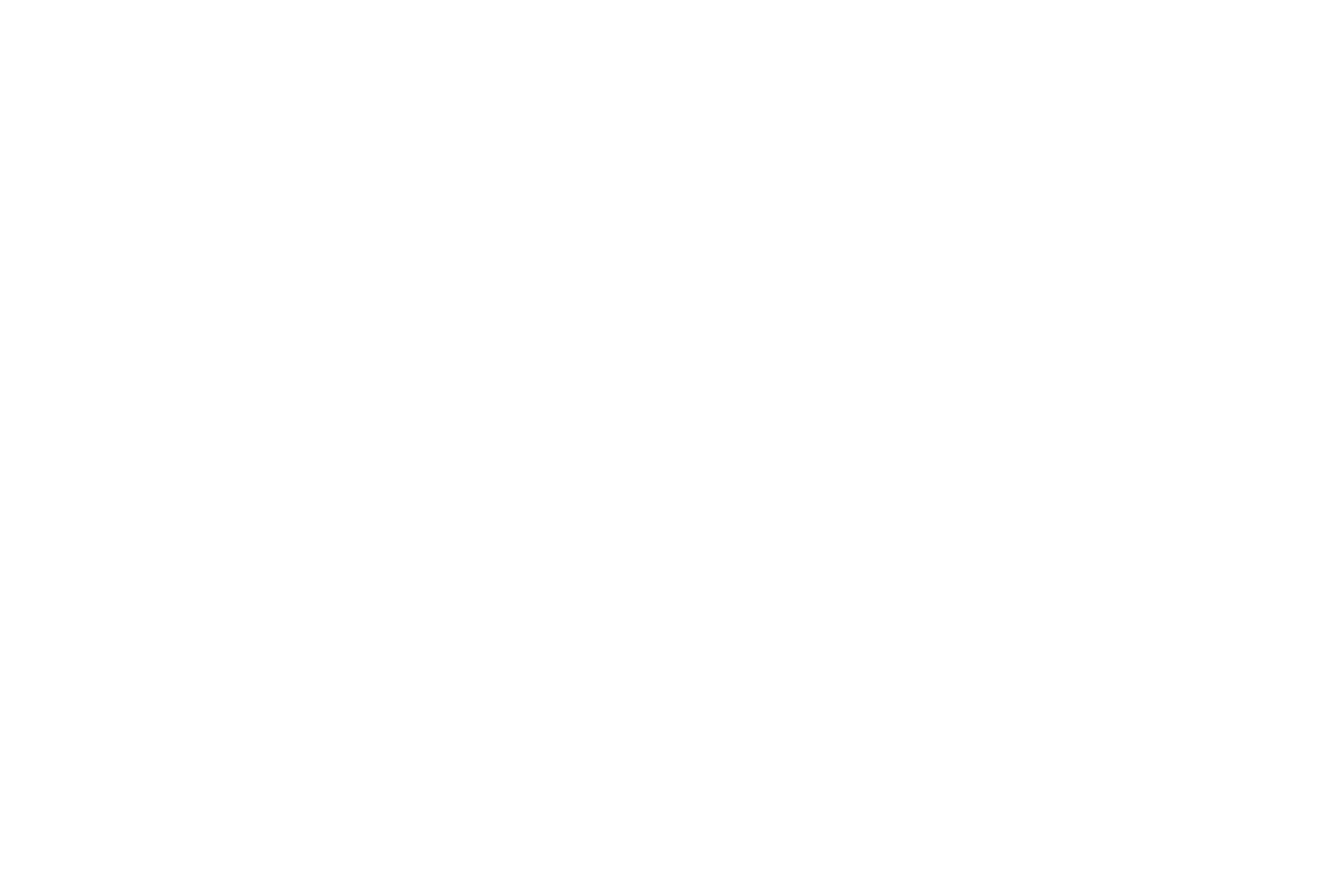

In [294]:
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)
step = 5

camera = Camera(fig)
for year in range(-50, 450, step):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = origo_linepoints_gdf[origo_linepoints_gdf["date"].between(year-4, year)]
    list_subset.plot(ax=ax, markersize=1, color=list_subset["color"])
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_linepoints.gif')

# Data for background lines

<AxesSubplot: >

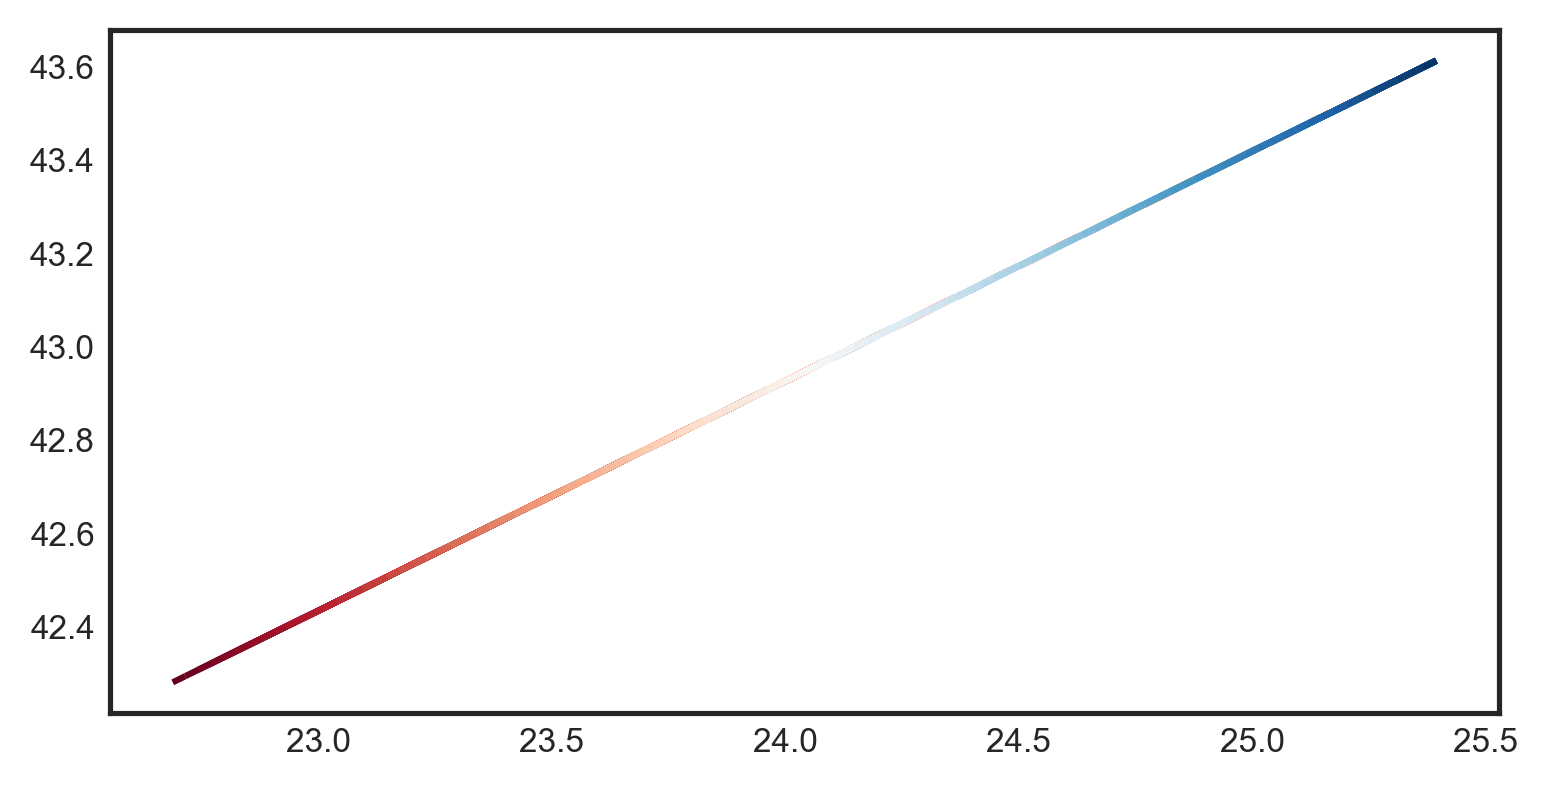

In [322]:
n_segments = 100
segments = [LineString(
    [line.interpolate((i / n_segments), normalized=True), line.interpolate((i + 1 / n_segments), normalized=True)]) for
            i in range(0, n_segments)]
cm = plt.get_cmap('RdBu')
color_vals = list(cm([val / n_segments for val in range(n_segments)]))
segments_df = gpd.GeoDataFrame({"geometry": segments, "color": color_vals})
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()

segments_df.plot(color=segments_df["color"], ax=ax)

In [323]:
n_segments = 50
cm = plt.get_cmap('RdYlBu')
color_vals = list(cm([1 - (val / n_segments) for val in range(n_segments)]))

In [324]:
len(origo_geo)

642

In [312]:
n_segments = 50
all_years = []
all_segments = []
all_colors = []
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    segments = [LineString([line.interpolate((i / n_segments), normalized=True), line.interpolate(((i + 1) / n_segments), normalized=True)]) for i in range(0, n_segments)]
    years = [origo_geo.iloc[n]["random_date"]] * len(segments)
    all_years.extend(years)
    all_segments.extend(segments)
    all_colors.extend(color_vals)

segmentlines_df = gpd.GeoDataFrame({"year": all_years,
                                    "color" : all_colors,
                                    "geometry" : all_segments})

<AxesSubplot: >

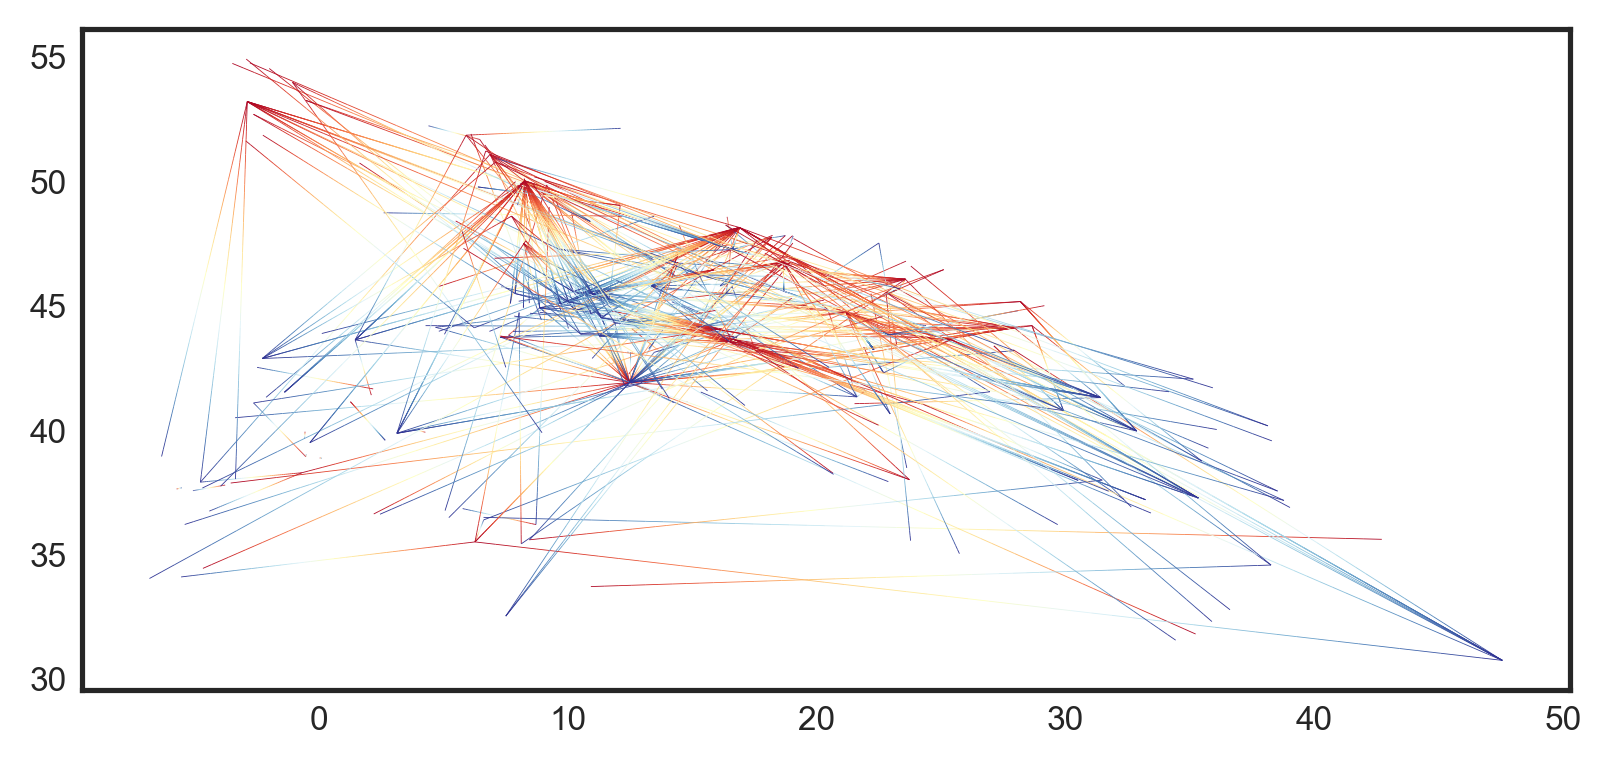

In [313]:
segmentlines_df.plot(color=segmentlines_df["color"], linewidth=0.2)

MovieWriter ffmpeg unavailable; using Pillow instead.


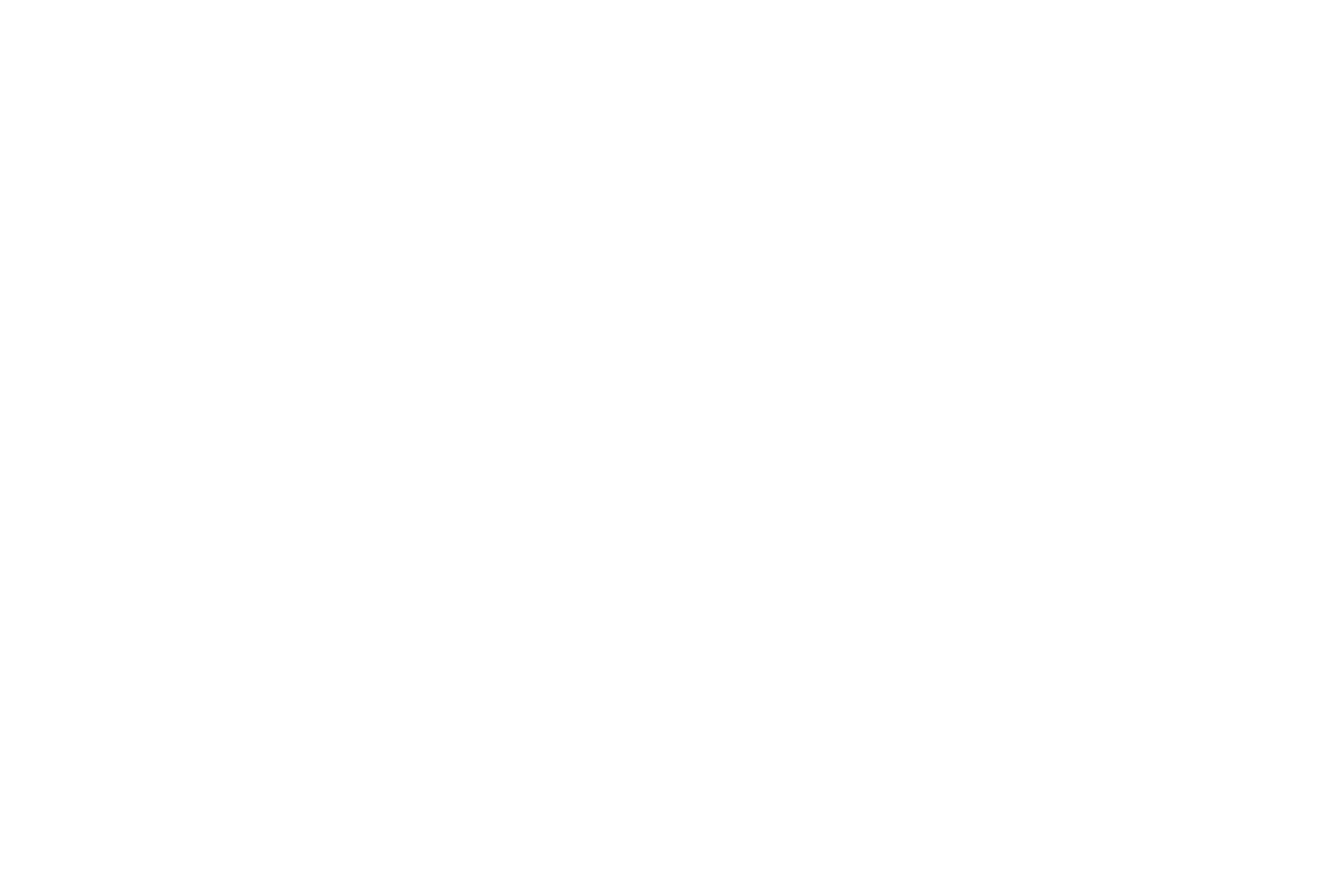

In [299]:
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)


camera = Camera(fig)
for year in range(100, 200, 5):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = segmentlines_df[(segmentlines_df["year"]<=year) & (segmentlines_df["year"]>year-keep)]
    list_subset.plot(ax=ax, color=list_subset["color"], linewidth=0.2)
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim3_linesegments.gif')

# Points with changing color

In [325]:
points_n = 10
line = origo_geo.iloc[0]["origo_line"]
print(line)

LINESTRING (23.342891 42.722826, 12.4862 41.8917)


In [326]:
print(Point(line.interpolate(1, normalized=True)))

POINT (12.4862 41.8917)


In [327]:
points = [Point(line.interpolate((i / (points_n-1)), normalized=True)) for i in range(0,points_n)]
for point in points:
    print(point)

POINT (23.342891 42.722826)
POINT (22.136592 42.63047866666666)
POINT (20.930293000000002 42.53813133333333)
POINT (19.723994 42.445783999999996)
POINT (18.517695000000003 42.35343666666667)
POINT (17.311396000000002 42.26108933333333)
POINT (16.105097 42.168742)
POINT (14.898798000000001 42.076394666666666)
POINT (13.692499000000002 41.984047333333336)
POINT (12.4862 41.8917)


In [328]:
markersizes = np.ones(10)
markersizes[0], markersizes[-1] = 3, 3

In [336]:
points_n = 50
cm = plt.get_cmap('RdYlBu')
colors = list(cm([1 - (val / points_n) for val in range(points_n)]))
markersizes = np.ones(points_n)
markersizes[0], markersizes[-1] = 3, 3
all_dates = []
all_points = []
all_colors = []
all_markersizes = []
step_len = 1
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    dates = range(year - age + step_len, year + step_len, step_len)
    points = [Point(line.interpolate((i / (points_n-1)), normalized=True)) for i in range(0,points_n)]
    all_dates.extend(dates)
    all_points.extend(points)
    all_colors.extend(colors)
    all_markersizes.extend(markersizes)
origo_linepoints_gdf = gpd.GeoDataFrame({"date": all_dates, "geometry": all_points, "color": all_colors, "markersize" : all_markersizes})
origo_linepoints_gdf

,date,geometry,color,markersize
0,177,POINT (23.34289 42.72283),"[0.19215686274509805, 0.21176470588235294, 0.5...",3.0
1,178,POINT (23.12133 42.70586),"[0.2075355632449058, 0.2602076124567474, 0.608...",1.0
2,179,POINT (22.89976 42.68890),"[0.22291426374471357, 0.3086505190311419, 0.63...",1.0
3,180,POINT (22.67820 42.67194),"[0.23829296424452134, 0.3570934256055363, 0.65...",1.0
4,181,POINT (22.45663 42.65498),"[0.2536716647443291, 0.4055363321799308, 0.679...",1.0
...,...,...,...,...
32095,208,POINT (25.17349 43.50382),"[0.8392925797770088, 0.18454440599769317, 0.15...",1.0
32096,209,POINT (25.22872 43.53099),"[0.8008458285274894, 0.14763552479815456, 0.15...",1.0
32097,210,POINT (25.28394 43.55816),"[0.7623990772779701, 0.11072664359861592, 0.15...",1.0
32098,211,POINT (25.33917 43.58533),"[0.7239523260284506, 0.07381776239907728, 0.15...",1.0


In [343]:
year = 50
segmentlines_subset = segmentlines_df[(segmentlines_df["year"]>=year) & (segmentlines_df["year"]<year+keep)]
segmentlines_subset

,year,color,geometry
50,68,"[0.19215686274509805, 0.21176470588235294, 0.5...","LINESTRING (8.86545 44.89717, 8.93787 44.83706)"
51,68,"[0.2075355632449058, 0.2602076124567474, 0.608...","LINESTRING (8.93787 44.83706, 9.01028 44.77695)"
52,68,"[0.22291426374471357, 0.3086505190311419, 0.63...","LINESTRING (9.01028 44.77695, 9.08270 44.71684)"
53,68,"[0.23829296424452134, 0.3570934256055363, 0.65...","LINESTRING (9.08270 44.71684, 9.15511 44.65673)"
54,68,"[0.2536716647443291, 0.4055363321799308, 0.679...","LINESTRING (9.15511 44.65673, 9.22753 44.59662)"
...,...,...,...
31895,97,"[0.8392925797770088, 0.18454440599769317, 0.15...","LINESTRING (9.91424 49.40564, 9.34913 49.67587)"
31896,97,"[0.8008458285274894, 0.14763552479815456, 0.15...","LINESTRING (9.34913 49.67587, 8.78402 49.94610)"
31897,97,"[0.7623990772779701, 0.11072664359861592, 0.15...","LINESTRING (8.78402 49.94610, 8.21892 50.21634)"
31898,97,"[0.7239523260284506, 0.07381776239907728, 0.15...","LINESTRING (8.21892 50.21634, 7.65381 50.48657)"


In [331]:
len(segmentlines_subset)

8000

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been dis

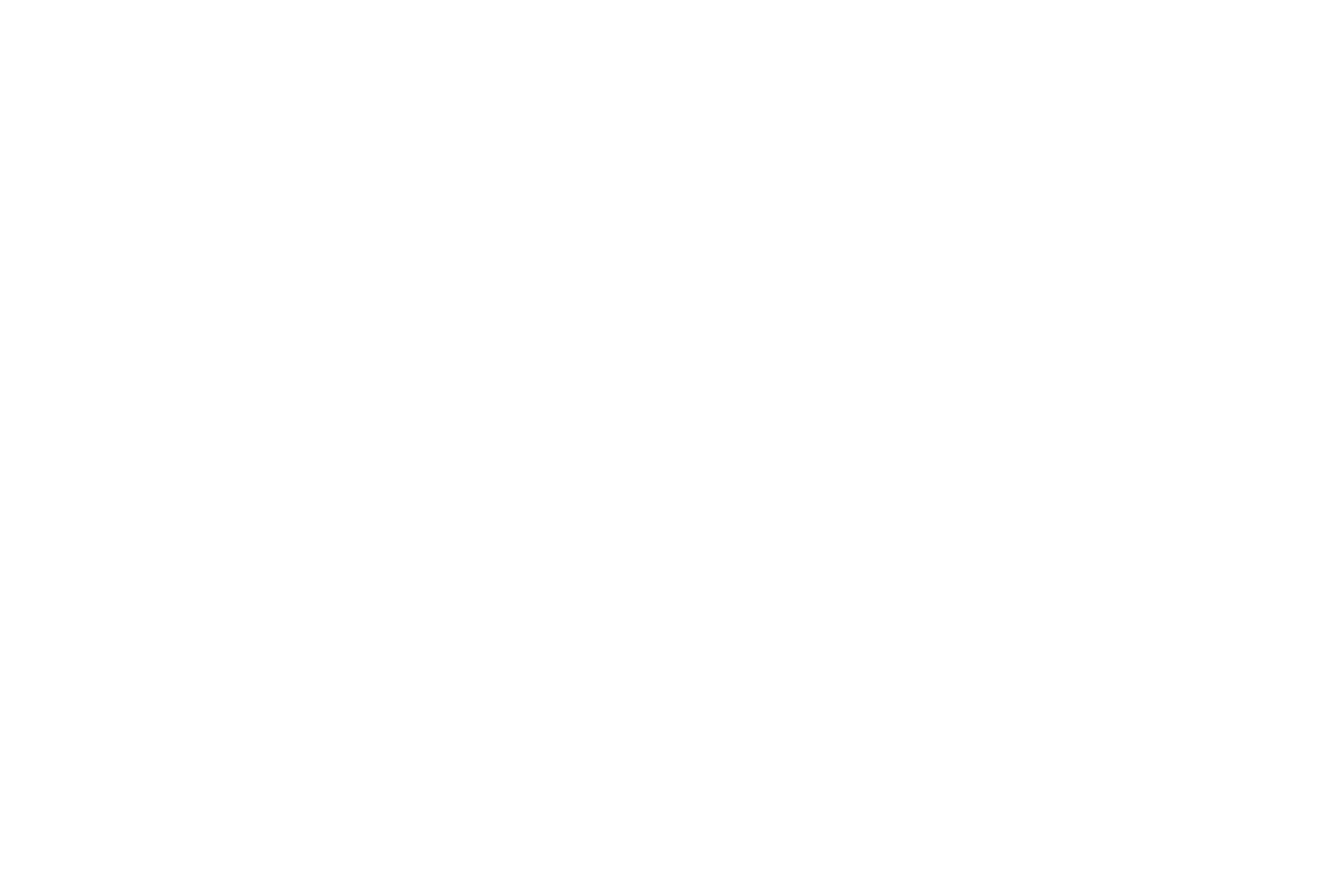

In [344]:
keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)


camera = Camera(fig)
for year in range(-100, 400, 2):
    # lines
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    segmentlines_subset = segmentlines_df[(segmentlines_df["year"]>=year) & (segmentlines_df["year"]<year+keep)]
    segmentlines_subset.plot(ax=ax, color=segmentlines_subset["color"], linewidth=0.2)
    # moving points
    linepoints_subset = origo_linepoints_gdf[origo_linepoints_gdf["date"]==year]
    linepoints_subset.plot(ax=ax, color=linepoints_subset["color"], markersize=linepoints_subset["markersize"])
    # staying dots
    sourcedest_subset = origo_geo[origo_geo["random_date"]<=year]
    sourcedest_subset.set_geometry("origo_point").plot(color="darkblue", markersize=1, alpha=0.3, ax=ax)
    sourcedest_subset.set_geometry("edh_point").plot(color="darkred", markersize=1, alpha=0.3, ax=ax)
    ax.text(30,55, str(year), fontsize=12, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim4_linesegments+points.gif')

In [ ]:
# next option might be: https://pydeck.gl
#see example here: https://pydeck.gl/gallery/arc_layer.html
# or https://pydeck.gl/gallery/great_circle_layer.html


# On Orbis network

In [ ]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [ ]:
G.edges(data=True)

# Adela's data

In [ ]:
orig_dest155 = gpd.read_file("../data/orig_dest155.geojson", driver="GeoJSON")

In [ ]:
orig_dest155.plot()

In [ ]:
# - start with simple space-abstracted animation of dots moving from origo to destintion
# - in a next step, we will move it to Orbis


In [30]:
origo_points_list = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
    dates = range(year-age+step_len,year+step_len, step_len)
    for i,y in enumerate(dates):
        data = {
            "date": y,
            "geometry" : Point(line.interpolate((i/len(dates)), normalized=True)),
            "color" : color
        }
        origo_points_list.append(data)

In [31]:
origo_geo

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,urban_context_city,urban_context_pop_est,withinRE?,type_of_inscription_auto,type_of_inscription_auto_prob,edh_point,random_dates,random_date,origo_point,origo_line
445538,445539,EDCS-24900101,HD064259,https://www.trismegistos.org/text/178228,,N(umerius) &lt;G=C&gt;ranonius N(umeri) f(iliu...,N(umerius) Granonius N(umeri) f(ilius) <G=C>al...,N lt C gt ranonius N f Cal domo Luceria IIII v...,Numerius lt;G gt;ranonius Numeri filius Cal do...,Numerius lt G gt ranonius Numeri filius Cal do...,...,Athenae,58112.0,True,None,0.0,POINT (23.728 37.984),"[-17, -29, -3, -24, -2, -11, -12, -24, -19, 8]",-17,POINT (15.3354745 41.5086475),"LINESTRING (15.33547 41.50865, 23.72798 37.98415)"
445571,445572,EDCS-11700037,HD019463,https://www.trismegistos.org/text/177113,,[---] Viruno / [--- v]ixit / [------,] Viruno / [3 v]ixit / [,Viruno ixit,Viruno vixit,Viruno vixit,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[125, 125, 121, 122, 127, 125, 124, 126, 121, ...",125,POINT (14.3647773 46.6996149),"LINESTRING (14.36478 46.69961, 23.72798 37.98415)"
445574,445575,EDCS-11700044,HD013721,https://www.trismegistos.org/text/177091,,C(aio) Mucio C(ai) f(ilio) Cla/udio Gemenel(l)...,G(aio!) Mucio G(ai!) f(ilio) Cla/udio Gemenelo...,C Mucio C f Claudio Gemenelo mathe tr ex class...,Caio Mucio Cai filio Claudio Gemenello mathema...,Caio Mucio Cai filio Claudio Gemenello mathema...,...,Athenae,58112.0,True,epitaph,1.0,POINT (23.728 37.984),"[118, 115, 120, 104, 108, 101, 94, 134, 158, 83]",118,POINT (7.2758295 43.7194725),"LINESTRING (7.27583 43.71947, 23.72798 37.98415)"
446675,446676,EDCS-20700285,HD023339,https://www.trismegistos.org/text/244141,109008,V(ivus) f(ecit) // L(ucius) Ursius / Sosander ...,V(ivus) f(ecit) / L(ucius) Ursius / Sosander /...,V f L Ursius Sosander vestiar Bonon sibi et Ru...,Vivus fecit Lucius Ursius Sosander vestiarius ...,Vivus fecit Lucius Ursius Sosander vestiarius ...,...,None,NaN,True,epitaph,1.0,POINT (1.617 50.717),"[204, 238, 176, 237, 206, 223, 248, 240, 161, ...",204,POINT (10.026149 45.133639),"LINESTRING (10.02615 45.13364, 1.61670 50.71670)"
446733,446734,EDCS-09300905,HD006780,https://www.trismegistos.org/text/264182,423025,Sex(tus) Gracch[ius] / T(iti) f(ilius) Pol(lia...,Sex(tus) Gracchi[us] / T(iti) f(ilius) Pol(lia...,Sex Gracch T f Pol Fronto Faventia miles coh I...,Sextus Gracchius Titi filius Pollia Fronto Fav...,Sextus Gracchius Titi filius Pollia Fronto Fav...,...,Roma,923313.0,True,epitaph,1.0,POINT (12.486 41.892),"[120, 165, 165, 104, 104, 166, 148, 100, 186, ...",120,POINT (11.883507 44.286236),"LINESTRING (11.88351 44.28624, 12.48620 41.89170)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524327,524328,None,HD078033,None,109169,L(ucius) Antest[i]us / M(arci) f(ilius) Ani(en...,None,L Antestus M f Ani Tertius Cremon mil leg an L...,Lucius Antestius Marci filius Aniensis Tertius...,Lucius Antestius Marci filius Aniensis Tertius...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[135, 109, 139, 135, 128, 110, 119, 124, 137, ...",135,POINT (10.026149 45.133639),"LINESTRING (10.02615 45.13364, 8.26740 49.99510)"
524329,524330,None,HD078035,None,109169,------](?) / [---]I(?)M(?)[---] / [---] Tolo[s...,None,IM Tolo eg I st,IM Tolosa legionis IIII stipendiorum,IM Tolosa legionis IIII stipendiorum,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267 49.995),"[87, 86, 79, 97, 95, 89, 89, 94, 74, 100]",87,POINT (1.443246 43.604175),"LINESTRING (1.44325 43.60417, 8.26740 49.99510)"
524342,524343,None,HD078058,None,109169,[------] / Atinius / Sept&lt;i&gt;mi / f(ilius...,None,Atinius Sept lt i gt mi f Romilia Ateste mil l...,Atinius Sept lt;i gt;mi filius Romilia Ateste ...,Atinius Sept lt i gt mi filius Romilia Ateste ...,...,Mogontiacum,19930.0,True,epitaph,1.0,POINT (8.267

In [32]:
gpd.GeoDataFrame(origo_points_list)

,date,geometry,color
0,-62,POINT (15.33547 41.50865),tab:cyan
1,-57,POINT (16.17473 41.15620),tab:cyan
2,-52,POINT (17.01398 40.80375),tab:cyan
3,-47,POINT (17.85323 40.45130),tab:cyan
4,-42,POINT (18.69248 40.09885),tab:cyan
...,...,...,...
5235,93,POINT (8.95808 46.26624),tab:pink
5236,98,POINT (8.81017 46.50897),tab:pink
5237,103,POINT (8.66225 46.75171),tab:pink
5238,108,POINT (8.51433 46.99444),tab:pink


In [33]:
origo_points_list

[{'date': -62,
  'geometry': <shapely.geometry.point.Point at 0x2b7471d30>,
  'color': 'tab:cyan'},
 {'date': -57,
  'geometry': <shapely.geometry.point.Point at 0x2b771a820>,
  'color': 'tab:cyan'},
 {'date': -52,
  'geometry': <shapely.geometry.point.Point at 0x2b771a1c0>,
  'color': 'tab:cyan'},
 {'date': -47,
  'geometry': <shapely.geometry.point.Point at 0x2b771a5b0>,
  'color': 'tab:cyan'},
 {'date': -42,
  'geometry': <shapely.geometry.point.Point at 0x2b771a5e0>,
  'color': 'tab:cyan'},
 {'date': -37,
  'geometry': <shapely.geometry.point.Point at 0x2b793c850>,
  'color': 'tab:cyan'},
 {'date': -32,
  'geometry': <shapely.geometry.point.Point at 0x2b771aaf0>,
  'color': 'tab:cyan'},
 {'date': -27,
  'geometry': <shapely.geometry.point.Point at 0x2b771ae20>,
  'color': 'tab:cyan'},
 {'date': -22,
  'geometry': <shapely.geometry.point.Point at 0x2b771aca0>,
  'color': 'tab:cyan'},
 {'date': -17,
  'geometry': <shapely.geometry.point.Point at 0x2b771a910>,
  'color': 'tab:cyan'},


In [34]:
n = 0
line = origo_geo.iloc[n]["origo_line"]
line = origo_geo.iloc[n]["origo_line"]
year = origo_geo.iloc[n]["random_date"]
color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
dates = range(year-age+step_len,year+step_len, step_len)
print(Point(line.interpolate(0.12, normalized=True)))

POINT (16.342575676 41.085707716)


In [35]:
[Point(line.interpolate((i/(len(dates)-2)), normalized=True)) for i in range(len(dates) - 2)]

In [53]:
[Point(line.split((i/(len(dates)-2)), normalized=True)) for i in range(len(dates) - 2)]


AttributeError: 'LineString' object has no attribute 'split'

In [36]:
colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
colors

['tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple',
 'tab:purple']

In [37]:
all_dates = []
all_points = []
all_colors = []
step_len = 5
age = 50
for n in range(len(origo_geo)):
    line = origo_geo.iloc[n]["origo_line"]
    year = origo_geo.iloc[n]["random_date"]
    colors = [random.choice(list(mcolors.TABLEAU_COLORS.keys()))] * len(dates)
    dates = range(year-age+step_len,year+step_len, step_len)
    points = [Point(line.interpolate((i/(len(dates)-3)), normalized=True)) for i in range(len(dates) - 2)]
    points = [origo_geo.iloc[n]["origo_point"]] + points +  [origo_geo.iloc[n]["edh_point"]]
    all_dates.extend(dates)
    all_points.extend(points)
    all_colors.extend(colors)

In [38]:
origo_linepoints_gdf = gpd.GeoDataFrame({"date" : all_dates, "geometry" : all_points, "color" : all_colors})
origo_linepoints_gdf

,date,geometry,color
0,-62,POINT (15.33547 41.50865),tab:pink
1,-57,POINT (15.33547 41.50865),tab:pink
2,-52,POINT (16.53440 41.00515),tab:pink
3,-47,POINT (17.73333 40.50165),tab:pink
4,-42,POINT (18.93226 39.99815),tab:pink
...,...,...,...
5235,93,POINT (8.85243 46.43962),tab:purple
5236,98,POINT (8.64112 46.78638),tab:purple
5237,103,POINT (8.42981 47.13314),tab:purple
5238,108,POINT (8.21850 47.47990),tab:purple


MovieWriter ffmpeg unavailable; using Pillow instead.


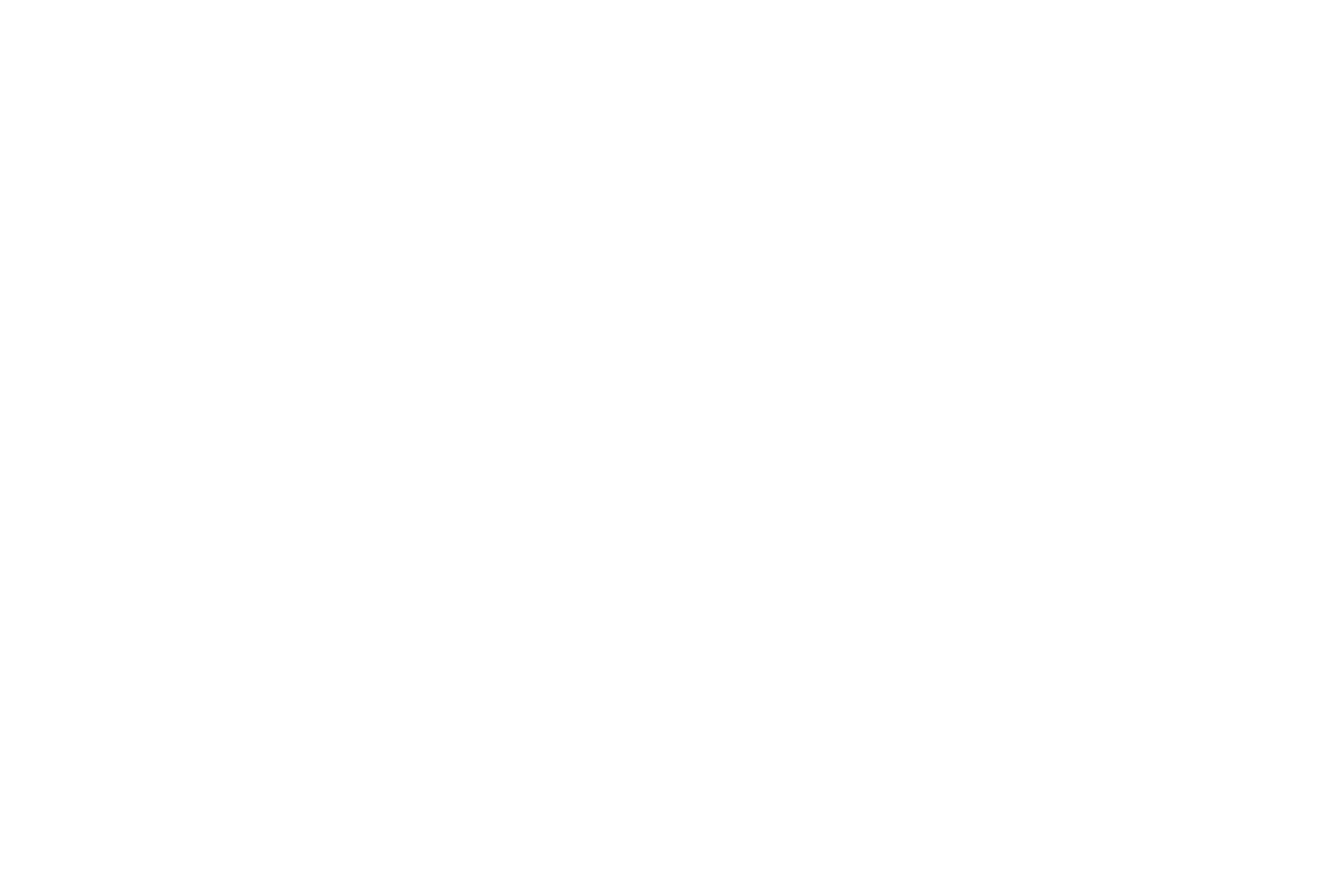

In [96]:
fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)
step = 5

camera = Camera(fig)
for year in range(-50, 450, step):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    list_subset = origo_linepoints_gdf[origo_linepoints_gdf["date"].between(year-4, year)]
    list_subset.plot(ax=ax, markersize=1, color=list_subset["color"])
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/anim1_linepoints.gif')

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

In [71]:
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))

array([ 9.99955409e-01,  9.99598704e-01,  9.98885422e-01,  9.97815817e-01,
        9.96390270e-01,  9.94609290e-01,  9.92473513e-01,  9.89983699e-01,
        9.87140738e-01,  9.83945644e-01,  9.80399556e-01,  9.76503739e-01,
        9.72259583e-01,  9.67668602e-01,  9.62732434e-01,  9.57452839e-01,
        9.51831701e-01,  9.45871024e-01,  9.39572937e-01,  9.32939684e-01,
        9.25973632e-01,  9.18677266e-01,  9.11053189e-01,  9.03104121e-01,
        8.94832897e-01,  8.86242467e-01,  8.77335896e-01,  8.68116362e-01,
        8.58587152e-01,  8.48751667e-01,  8.38613415e-01,  8.28176011e-01,
        8.17443181e-01,  8.06418751e-01,  7.95106655e-01,  7.83510928e-01,
        7.71635707e-01,  7.59485227e-01,  7.47063824e-01,  7.34375927e-01,
        7.21426063e-01,  7.08218851e-01,  6.94759004e-01,  6.81051321e-01,
        6.67100693e-01,  6.52912097e-01,  6.38490593e-01,  6.23841327e-01,
        6.08969524e-01,  5.93880488e-01,  5.78579603e-01,  5.63072327e-01,
        5.47364192e-01,  

In [ ]:

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

In [ ]:
# for lines: https://stackoverflow.com/questions/36074455/python-matplotlib-with-a-line-color-gradient-and-colorbar
colormap = "RdBu"

In [101]:
year = 150
origo_linepoints_gdf[origo_linepoints_gdf["date"].between(year-4, year)]

,date,geometry,color
44,148,POINT (12.14180 43.26001),tab:pink
80,147,POINT (5.76568 36.82098),tab:red
248,149,POINT (-2.89520 53.18550),tab:pink
497,149,POINT (22.10765 46.00505),tab:green
521,146,POINT (13.47026 43.10549),tab:orange
...,...,...,...
4975,148,POINT (10.40316 42.70489),tab:brown
4983,146,POINT (11.28006 44.22666),tab:green
4994,146,POINT (11.19302 43.97631),tab:pink
5011,149,POINT (13.51607 43.61899),tab:pink


# On Orbis network

In [10]:
G = nx.read_graphml("../data/orbis_network_enriched.graphml")

In [11]:
G.edges(data=True)

EdgeDataView([('50001', '50056', {'km': 54.539, 'expense_inverse': 0.5238344683080146, 'expense': 1.909, 'days': 1.818, 'route_type': 'road/road', 'gravity': 274.4025501875404, 'gravity_inverse': 0.0036442810000000005}), ('50001', '50100', {'km': 50.135, 'expense_inverse': 0.5698005698005698, 'expense': 1.755, 'days': 1.671, 'route_type': 'road/road', 'gravity': 324.67268934505404, 'gravity_inverse': 0.0030800249999999997}), ('50001', '50293', {'km': 65.681, 'expense_inverse': 0.43497172683775553, 'expense': 2.299, 'days': 2.189, 'route_type': 'road/road', 'gravity': 189.20040314821904, 'gravity_inverse': 0.0052854009999999995}), ('50001', '50473', {'km': 225.368, 'expense_inverse': 0.12677484787018256, 'expense': 7.888, 'days': 7.512, 'route_type': 'road/road', 'gravity': 16.07186205250793, 'gravity_inverse': 0.062220543999999996}), ('50056', '50314', {'km': 126.177, 'expense_inverse': 0.22644927536231882, 'expense': 4.416, 'days': 4.206, 'route_type': 'road/road', 'gravity': 543.9705

# Adela's data

In [6]:
orig_dest155 = gpd.read_file("../data/orig_dest155.geojson", driver="GeoJSON")

<AxesSubplot: >

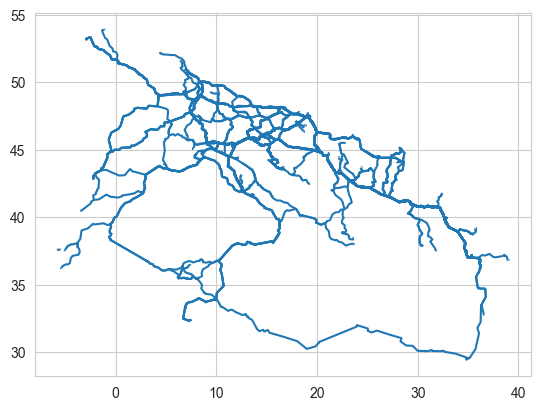

In [7]:
orig_dest155.plot()

In [8]:
# - start with simple space-abstracted animation of dots moving from origo to destintion
# - in a next step, we will move it to Orbis
